In [1]:
import jax
import jax.random as jrandom
import jax.numpy as jnp
import flax.linen as nn
import optax
from typing import Sequence, Callable, Optional, Dict, Any
import numpy as np

from mmnn_jax import SinActivation,SinTUActivation, MMNNLayer, MMNNModel, Train_jax_model


import matplotlib.pyplot as plt
plt.style.use('figures/images_style.mplstyle')



/work/Sebas/miniconda3/envs/MMNN/lib/python3.13/site-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.6.2 is installed, but it is not compatible with the installed jaxlib version 0.6.0, so it will not be used.
  warnings.warn(


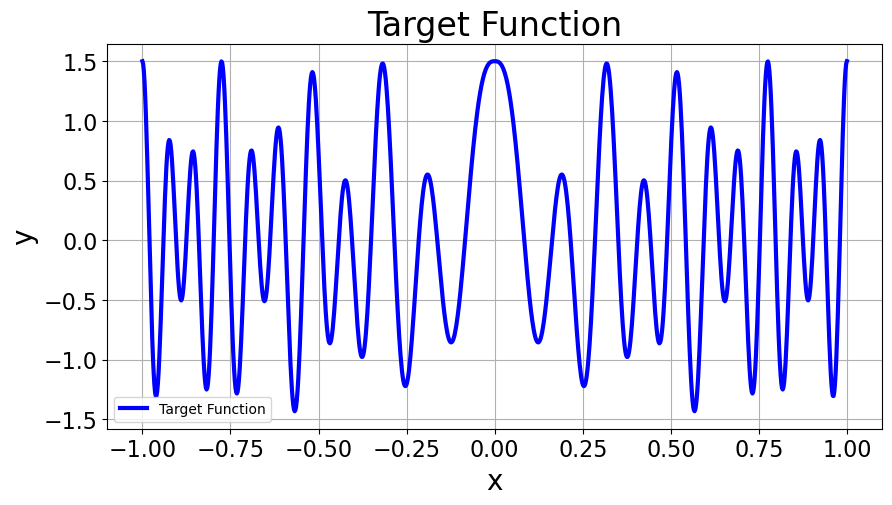

In [5]:
y = lambda x: np.cos(20*np.pi*np.abs(x)**(1.4))+0.5*np.cos(12*np.pi*np.abs(x)**(1.6))

# Input data

x = jnp.linspace(-1, 1, 1000)
x = x.reshape(-1, 1)  # Reshape to 2D array

# Target data

y_data = y(x)

# Plot data

plt.figure(figsize=(10, 5))
plt.plot(x, y_data, label='Target Function', color='blue')
plt.title('Target Function')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()


In [7]:
# Configuration using ranks and widths
ranks = [1]+ [18]*5 + [ 1]     # 
widths = [388]*6      # 

print("Network architecture:")
print(f"Ranks (dimensions): {ranks}")
print(f"Widths (hidden layer sizes): {widths}")

# Create model
model = MMNNModel(
    ranks=ranks,
    widths=widths,
    activation=SinTUActivation(),
    seed=42
)

scheduler = optax.exponential_decay(
    init_value=0.001,  # Initial learning rate
    transition_steps=100,  # Number of steps before decay
    decay_rate=0.96,  # Decay rate
    staircase=True  # Use staircase decay
)

train_model = Train_jax_model(
    model=model,
    input_data=x,
    target_data=y_data,
    optimizer='adam',
    loss_fn='mse',
    learning_rate=scheduler,
    num_epochs=5000,
    batch_size=100,
    random_seed=42
)

Network architecture:
Ranks (dimensions): [1, 18, 18, 18, 18, 18, 1]
Widths (hidden layer sizes): [388, 388, 388, 388, 388, 388]


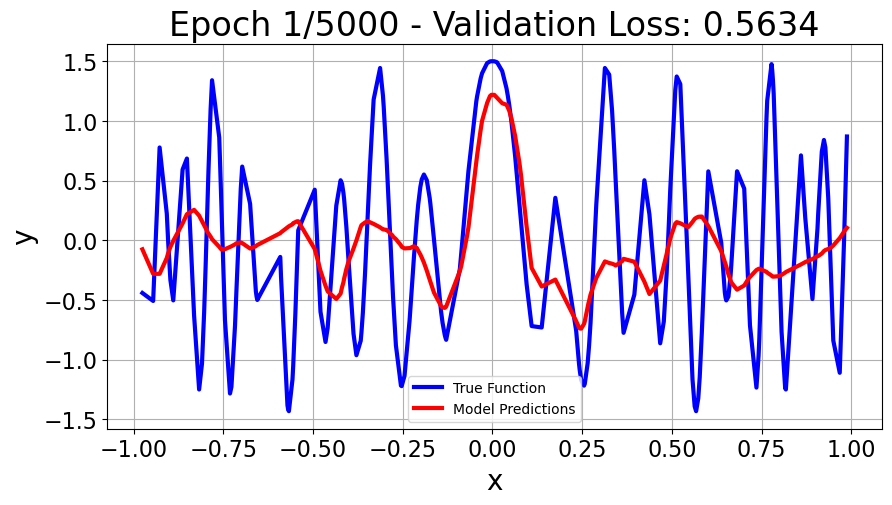

Epoch 1/5000, Training Loss: 1.0404, Validation Loss: 0.5634


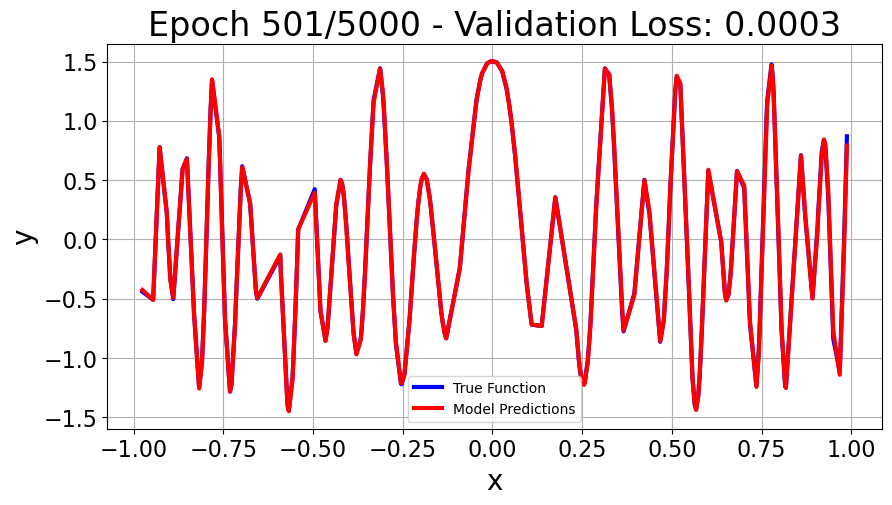

Epoch 501/5000, Training Loss: 0.0001, Validation Loss: 0.0003


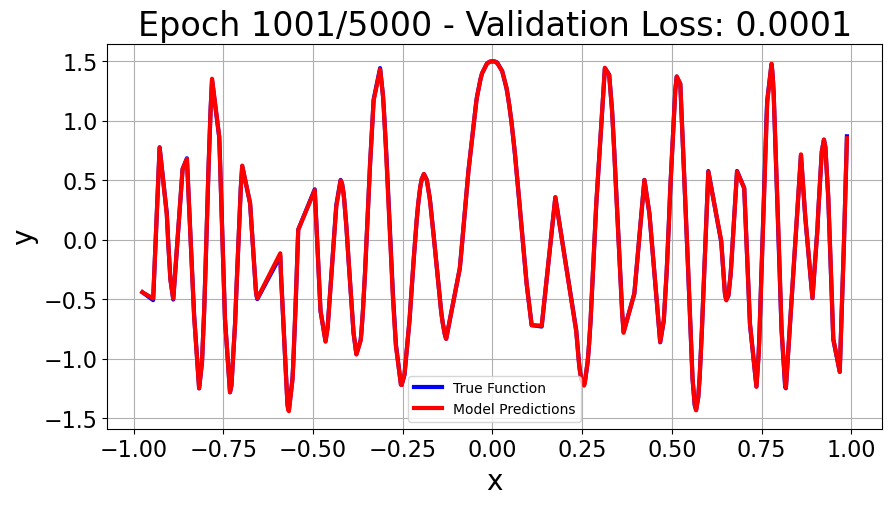

Epoch 1001/5000, Training Loss: 0.0000, Validation Loss: 0.0001


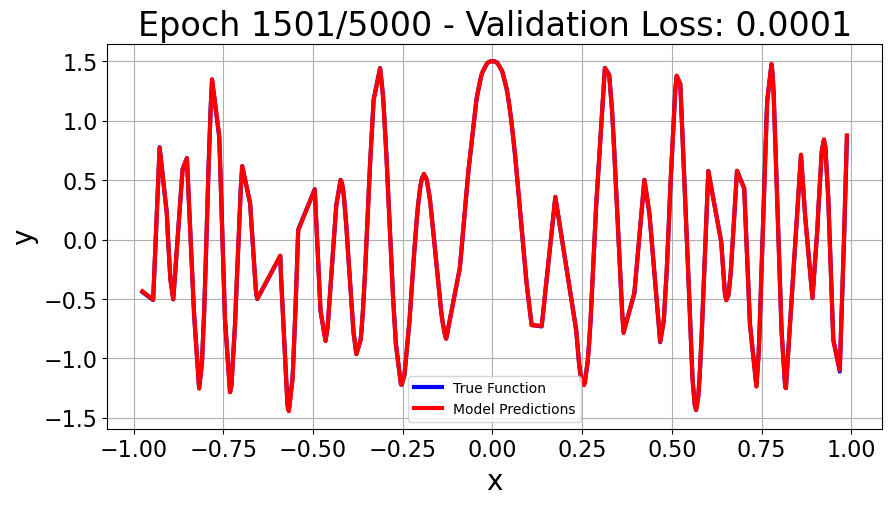

Epoch 1501/5000, Training Loss: 0.0000, Validation Loss: 0.0001


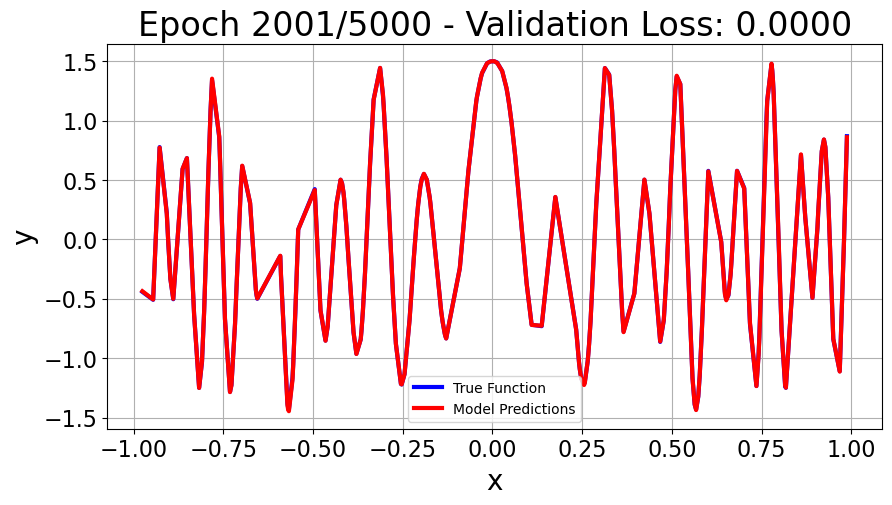

Epoch 2001/5000, Training Loss: 0.0000, Validation Loss: 0.0000


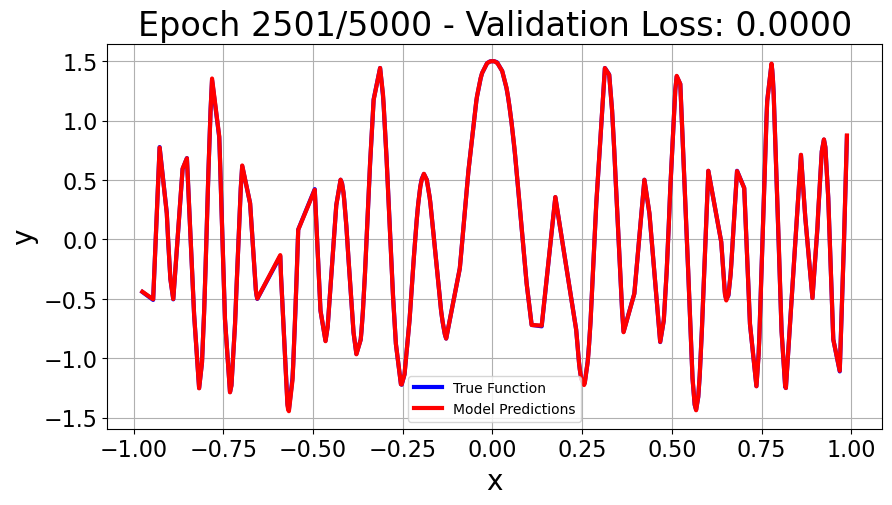

Epoch 2501/5000, Training Loss: 0.0000, Validation Loss: 0.0000


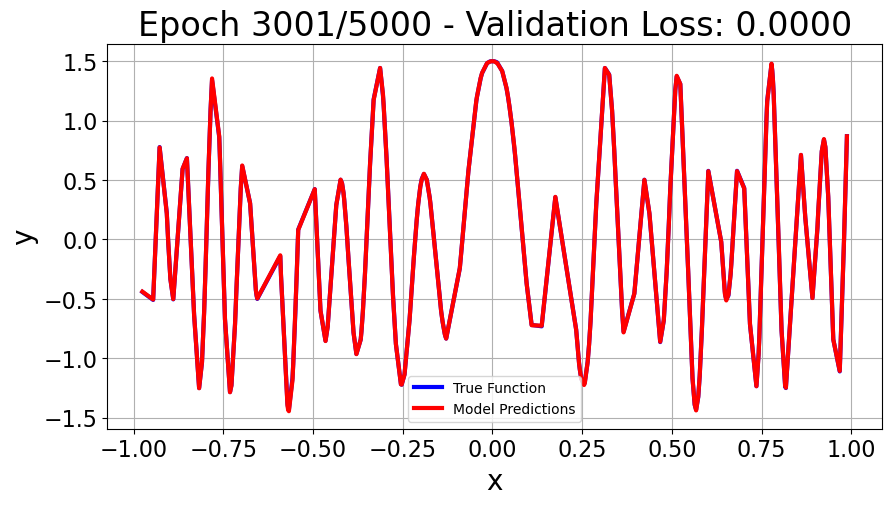

Epoch 3001/5000, Training Loss: 0.0000, Validation Loss: 0.0000


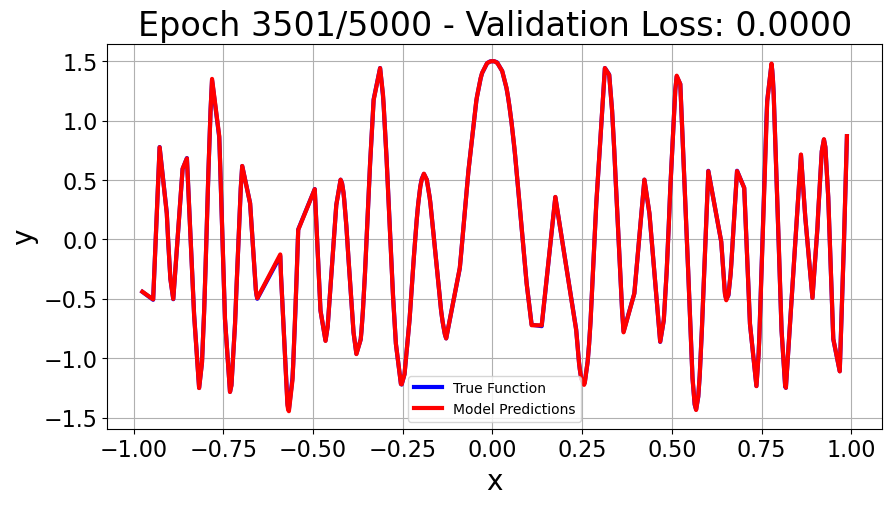

Epoch 3501/5000, Training Loss: 0.0000, Validation Loss: 0.0000


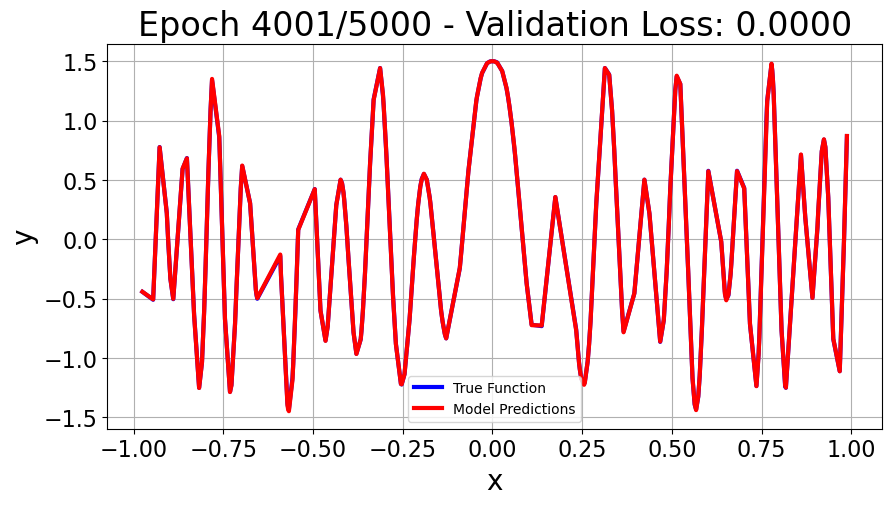

Epoch 4001/5000, Training Loss: 0.0000, Validation Loss: 0.0000


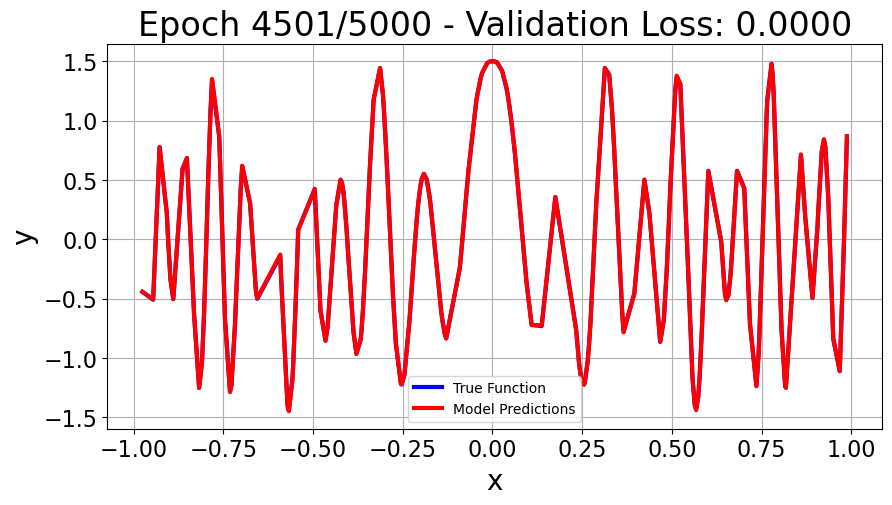

Epoch 4501/5000, Training Loss: 0.0000, Validation Loss: 0.0000


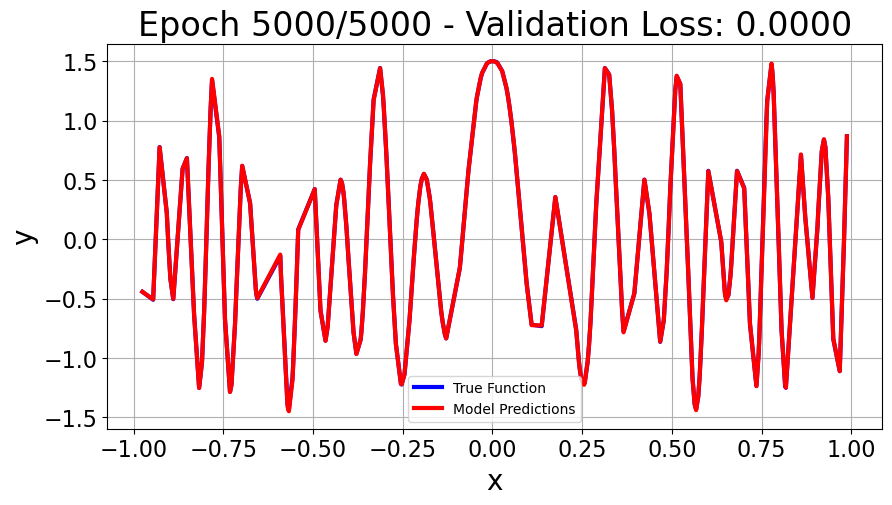

Epoch 5000/5000, Training Loss: 0.0000, Validation Loss: 0.0000


In [8]:
params,epochs_dict = train_model.training_loop(print_every=500)

In [13]:
x = jnp.linspace(-1.15, -.85, 2000).reshape(-1, 1)  # Reshape to 2D array for prediction
y_data = y(x)
y_pred = model.apply(params, x)

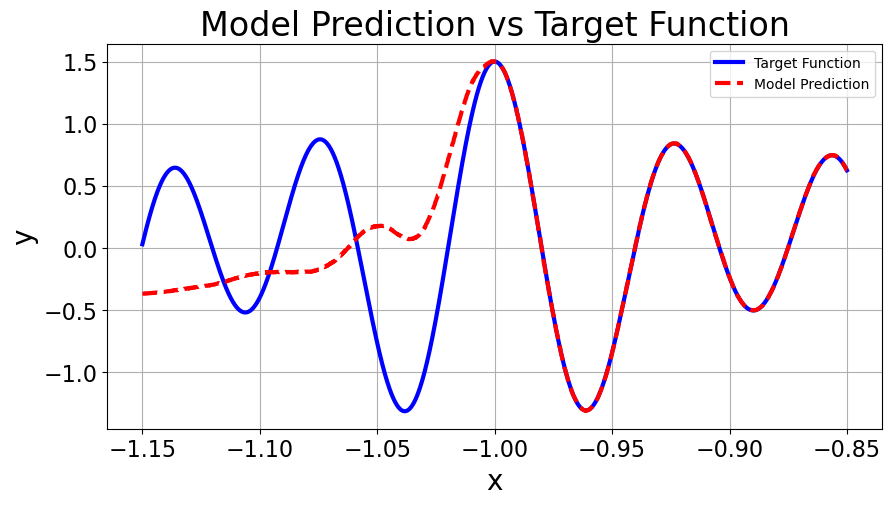

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(x, y_data, label='Target Function', color='blue')
plt.plot(x, y_pred, label='Model Prediction', color='red', linestyle='--')
plt.title('Model Prediction vs Target Function')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()